In [454]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [455]:
data=np.genfromtxt("mus.csv",delimiter=",",skip_header=1)

nlike=data[:,3]
ellike=data[:,6]
erlike=data[:,9]
sllike=data[:,12]
srlike=data[:,15]
tlike=data[:,18]


mask = (tlike>0.8) & (srlike>0.8) & (sllike>0.8)


nx=data[:,1][mask]
ny=data[:,2][mask]

elx=data[:,4][mask]
ely=data[:,5][mask]

erx=data[:,7][mask]
ery=data[:,8][mask]

slx=data[:,10][mask]
sly=data[:,11][mask]

srx=data[:,13][mask]
sry=data[:,14][mask]

tx=data[:,16][mask]
ty=data[:,17][mask]



Smidx=slx+(srx-slx)/2
Smidy=sly+(sry-sly)/2
midx=tx+(Smidx-tx)/2
midy=ty+(Smidy-ty)/2


v_x=np.abs(np.diff(midx))
v_y=np.abs(np.diff(midy))
speed=np.sqrt(v_x**2+v_y**2)

In [456]:
def Rayleigh(x,sigma1):
    return (x / sigma1**2) * np.exp(-(x**2) / (2 * sigma1**2))

def Rayleigh_mixture(x, sigma1, sigma2):
    r1 = (x / sigma1**2) * np.exp(-(x**2) / (2 * sigma1**2))
    r2 = (x / sigma2**2) * np.exp(-(x**2) / (2 * sigma2**2))
    
    return r1 + r2

def weighted_Rayleigh_mixture(x, sigma1, sigma2, w=0.5):
    r1 = (x / sigma1**2) * np.exp(-(x**2) / (2 * sigma1**2))
    r2 = (x / sigma2**2) * np.exp(-(x**2) / (2 * sigma2**2))
    
    return w * r1 + (1 - w) * r2

## Data med Hastighed udregnet hver frame

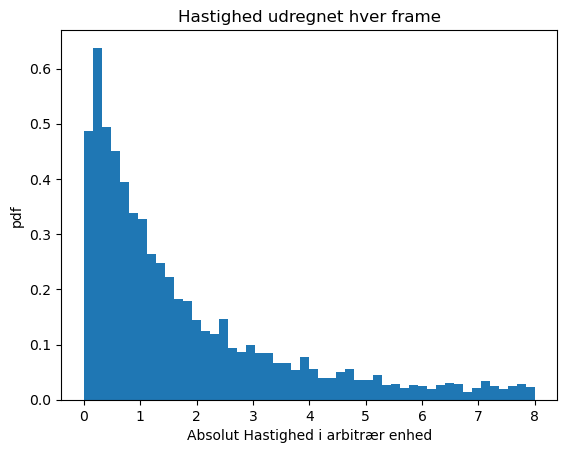

In [457]:
bin_size=50
x1=0
x2=8

counts,bin_edges,_ = plt.hist(speed,bins=bin_size,range=(x1,x2),density=True,log=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2



plt.xlabel("Absolut Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("Hastighed udregnet hver frame")
plt.show()


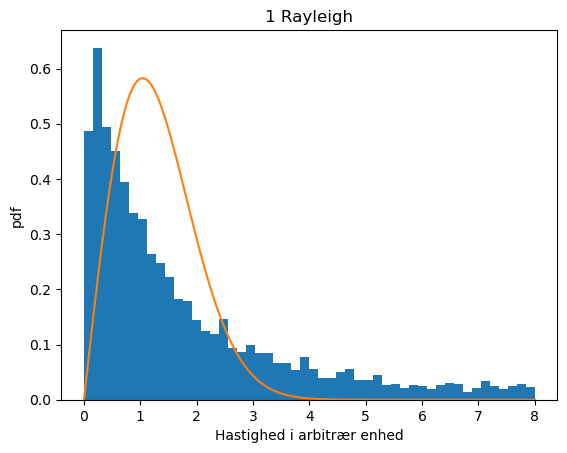

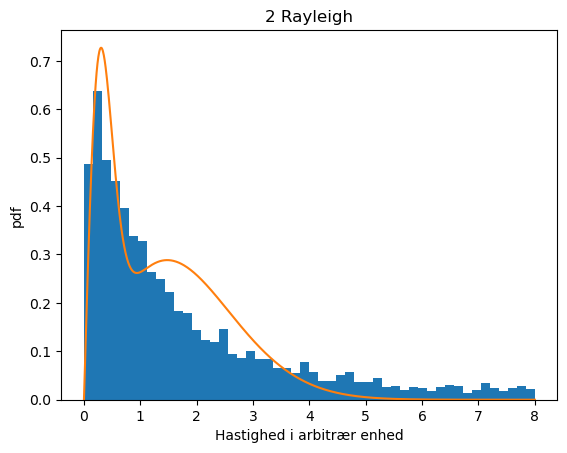

In [458]:

par1,cov1=curve_fit(Rayleigh,bin_centers,counts)
par2,cov2=curve_fit(weighted_Rayleigh_mixture,bin_centers,counts,p0=[0.2,1,0.9])
sigma1=par1[0]
sigma2_1=par2[0]
sigma2_2=par2[1]
weight=par2[2]

plt.hist(speed,bins=bin_size,range=(x1,x2),density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=Rayleigh(X,sigma1)
plt.plot(X,Y)

plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("1 Rayleigh")
plt.show()


plt.figure()
plt.hist(speed,bins=bin_size,range=(x1,x2),density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=weighted_Rayleigh_mixture(X,sigma2_1,sigma2_2,weight)
plt.plot(X,Y)

plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("2 Rayleigh")
plt.show()



## forsøger med sammenlagte hastigheder

In [459]:
sfs=3 #speed from steps
bin_size=20
x1=0
x2=8


n = len(speed)%sfs
if n != 0:
    speed_trunc = speed[:-n]
else:
    speed_trunc = speed

speed_new=speed_trunc.reshape(-1,sfs).sum(axis=1)

Jeg er helt generelt usikker på om denne måde at ændre dataen på er optimal da jeg summere op over hastigheder per sfs frames. Jeg ved ikke om man istedet burde kigge på hastigheden over den totale længde altså analysere punkt a og b hver 15 frames ud udregne hastigheden fra dettte. Er begge dele brownian motion????

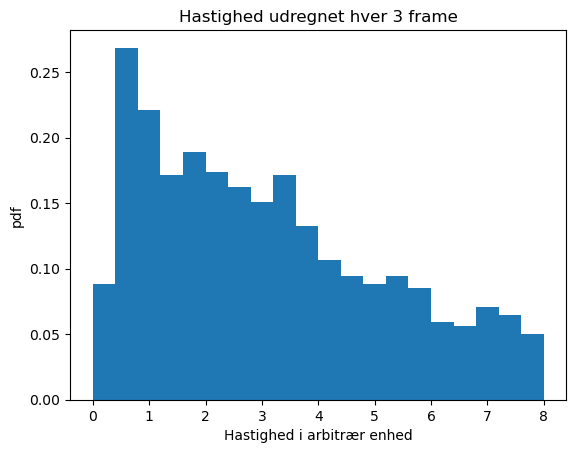

In [460]:
counts,bin_edges,_ = plt.hist(speed_new,bins=bin_size,range=(x1,x2),density=True,log=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2



plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("Hastighed udregnet hver "+str(sfs)+" frame")
plt.show()

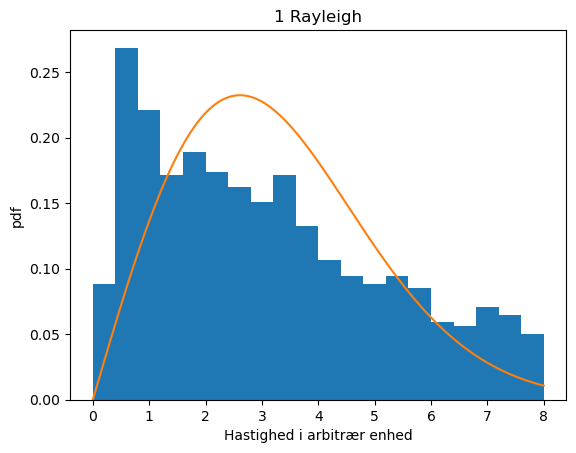

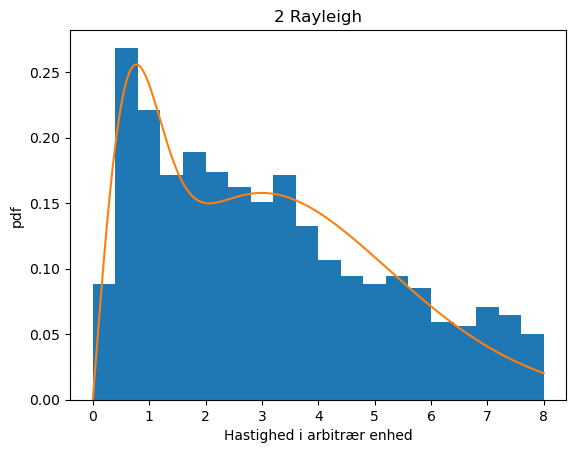

In [461]:
par1,cov1=curve_fit(Rayleigh,bin_centers,counts,p0=[0.5])
par2,cov2=curve_fit(weighted_Rayleigh_mixture,bin_centers,counts,p0=[0.8,2,0.8])
sigma1=par1[0]
sigma2_1=par2[0]
sigma2_2=par2[1]
weight=par2[2]

plt.hist(speed_new,bins=bin_size,range=(x1,x2),density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=Rayleigh(X,sigma1)
plt.plot(X,Y)

plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("1 Rayleigh")
plt.show()


plt.figure()
plt.hist(speed_new,bins=bin_size,range=(x1,x2),density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=weighted_Rayleigh_mixture(X,sigma2_1,sigma2_2,weight)
plt.plot(X,Y)

plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("2 Rayleigh")
plt.show()


## Overvejelse

med sfs=3 og kun at inkludere hastigheder fra 0 til 8 ser dataen skide god ud men det er måske en smule misvisende

## Forsøger med at inkludere hele datasættet

In [467]:
sfs=15 #speed from steps
bin_size=50



n = len(speed)%sfs
if n != 0:
    speed_trunc = speed[:-n]
else:
    speed_trunc = speed

speed_new=speed_trunc.reshape(-1,sfs).sum(axis=1)

x1=0
x2=np.max(speed_new)

238

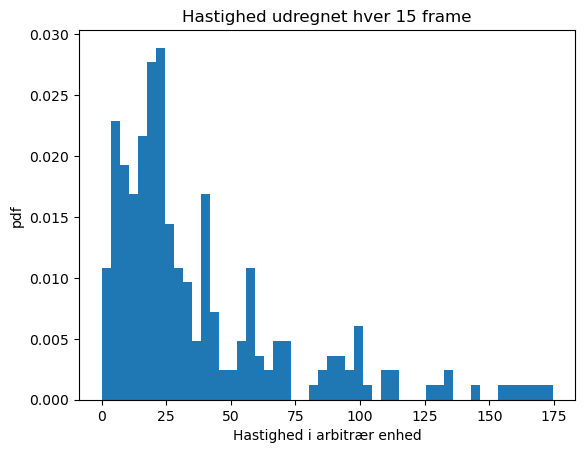

In [463]:
counts,bin_edges,_ = plt.hist(speed_new,bins=bin_size,range=(x1,x2),density=True,log=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2



plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("Hastighed udregnet hver "+str(sfs)+" frame")
plt.show()

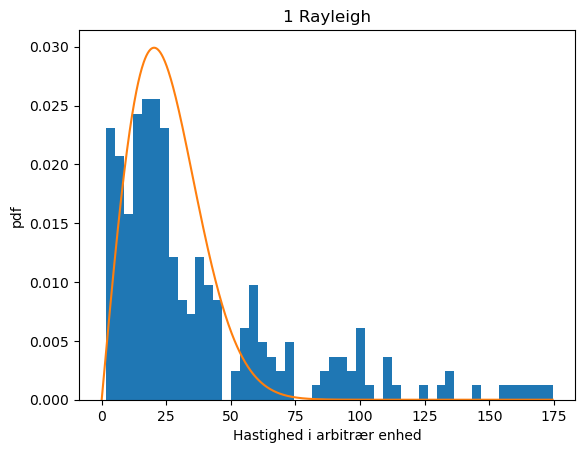

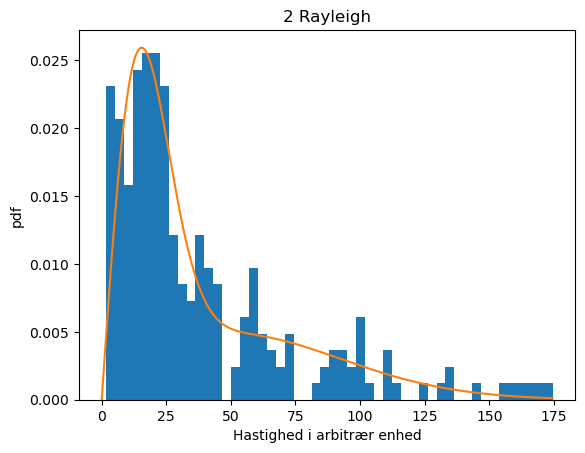

In [464]:
par1,cov1=curve_fit(Rayleigh,bin_centers,counts,p0=[20])
par2,cov2=curve_fit(weighted_Rayleigh_mixture,bin_centers,counts,p0=[20,50,0.5])
sigma1=par1[0]
sigma2_1=par2[0]
sigma2_2=par2[1]
weight=par2[2]

plt.hist(speed_new,bins=bin_size,density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=Rayleigh(X,sigma1)
plt.plot(X,Y)

plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("1 Rayleigh")
plt.show()


plt.figure()
plt.hist(speed_new,bins=bin_size,density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=weighted_Rayleigh_mixture(X,sigma2_1,sigma2_2,weight)

plt.plot(X,Y)


plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("2 Rayleigh")
plt.show()

## Forsøger anden hastigheds udregning metode (Total længde)

In [470]:
sfs = 15

n = len(midx) % sfs
if n != 0:
    x_trunc = midx[:-n]
    y_trunc = midy[:-n]
else:
    x_trunc = midx
    y_trunc = midy

x_blocks = x_trunc.reshape(-1, sfs)
y_blocks = y_trunc.reshape(-1, sfs)


speed_new = np.sqrt((x_blocks[:,-1] - x_blocks[:,0])**2 + (y_blocks[:,-1] - y_blocks[:,0])**2)

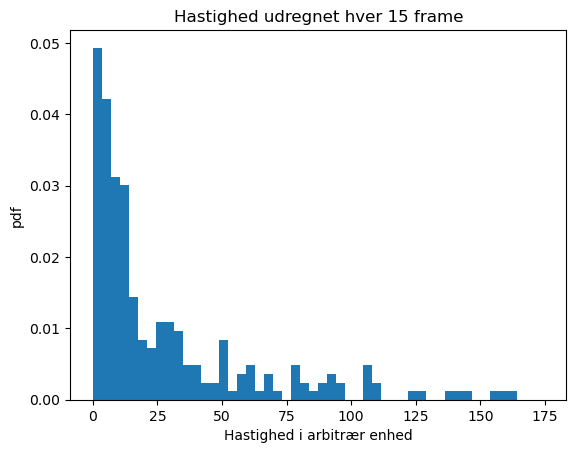

In [471]:
counts,bin_edges,_ = plt.hist(speed_new,bins=bin_size,range=(x1,x2),density=True,log=False)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2



plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("Hastighed udregnet hver "+str(sfs)+" frame")
plt.show()

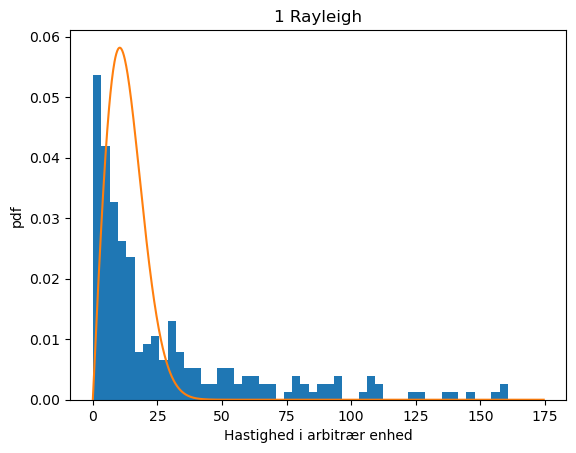

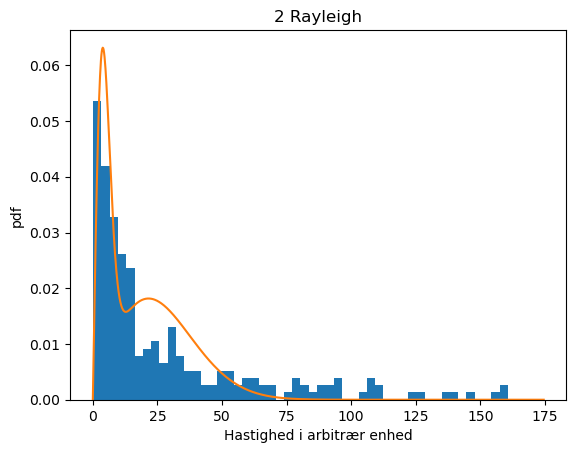

In [472]:
par1,cov1=curve_fit(Rayleigh,bin_centers,counts,p0=[20])
par2,cov2=curve_fit(weighted_Rayleigh_mixture,bin_centers,counts,p0=[20,50,0.5])
sigma1=par1[0]
sigma2_1=par2[0]
sigma2_2=par2[1]
weight=par2[2]

plt.hist(speed_new,bins=bin_size,density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=Rayleigh(X,sigma1)
plt.plot(X,Y)

plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("1 Rayleigh")
plt.show()


plt.figure()
plt.hist(speed_new,bins=bin_size,density=True,log=False,)
X=np.linspace(x1,x2,1000)
Y=weighted_Rayleigh_mixture(X,sigma2_1,sigma2_2,weight)

plt.plot(X,Y)


plt.xlabel("Hastighed i arbitrær enhed")
plt.ylabel("pdf")
plt.title("2 Rayleigh")
plt.show()